### Loading up commond DS libraries to be used throughout examples

In [3]:
#Import all needed libraries for lab
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Graphing Examples

## Some helpful resources

https://github.com/oreillymedia/introduction-to-seaborn/blob/master/intro-to-seaborn.md

Placing multiple plots in figure

In [ ]:
titanic_file = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/titanic/titanic_clean.csv'
df = pd.read_csv(titanic_file)
df2 = df.groupby(['Pclass','Survived'])[['Age']].count().reset_index().rename(columns={'Age':'Num of peeps'})


fig, ax_array = plt.subplots(2,2, figsize=(10,10))

sns.boxplot(x=df['Fare'],y=df['Pclass'],orient='h',ax = ax_array[0,0])
sns.barplot(data = df2, x = 'Pclass', y = 'Num of peeps', hue = 'Survived', ax = ax_array[0,1])
#sns.lmplot('Age','Fare',df, )
ax_array[1,0].hist(df['Fare'],alpha=.5,bins=10)
ax_array[1,1].hist(df['Age'],alpha=.5,bins=10)

ax_array[0,0].set_xlabel('Fare')
ax_array[0][1].set_xlabel('PClass')
ax_array[1,0].set_xlabel('Bottom Left X')
ax_array[1,1].set_xlabel('Bottom Right X')

ax_array[0,0].set_ylabel('PClass')
ax_array[0][1].set_ylabel('Number of People')
ax_array[1,0].set_ylabel('Bottom Left Y')
ax_array[1,1].set_ylabel('Bottom Right Y')

plt.show()

## Histograms

In [ ]:
#Load titanic data set to plot 
titanic_file = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/titanic/titanic_clean.csv'
df = pd.read_csv(titanic_file)

Histogram with pandas

In [ ]:
df['Age'].plot(kind='hist')

Histogram using Seaborn

In [ ]:
fig, ax_array = plt.subplots(1,2, figsize=(10,4))

ax_array[0].hist(df['Age'],alpha=.5,bins=10)
ax_array[1].hist(df['Age'],alpha=.5,bins=10)

plt.show()

## Plotting multiple dotplots togetether

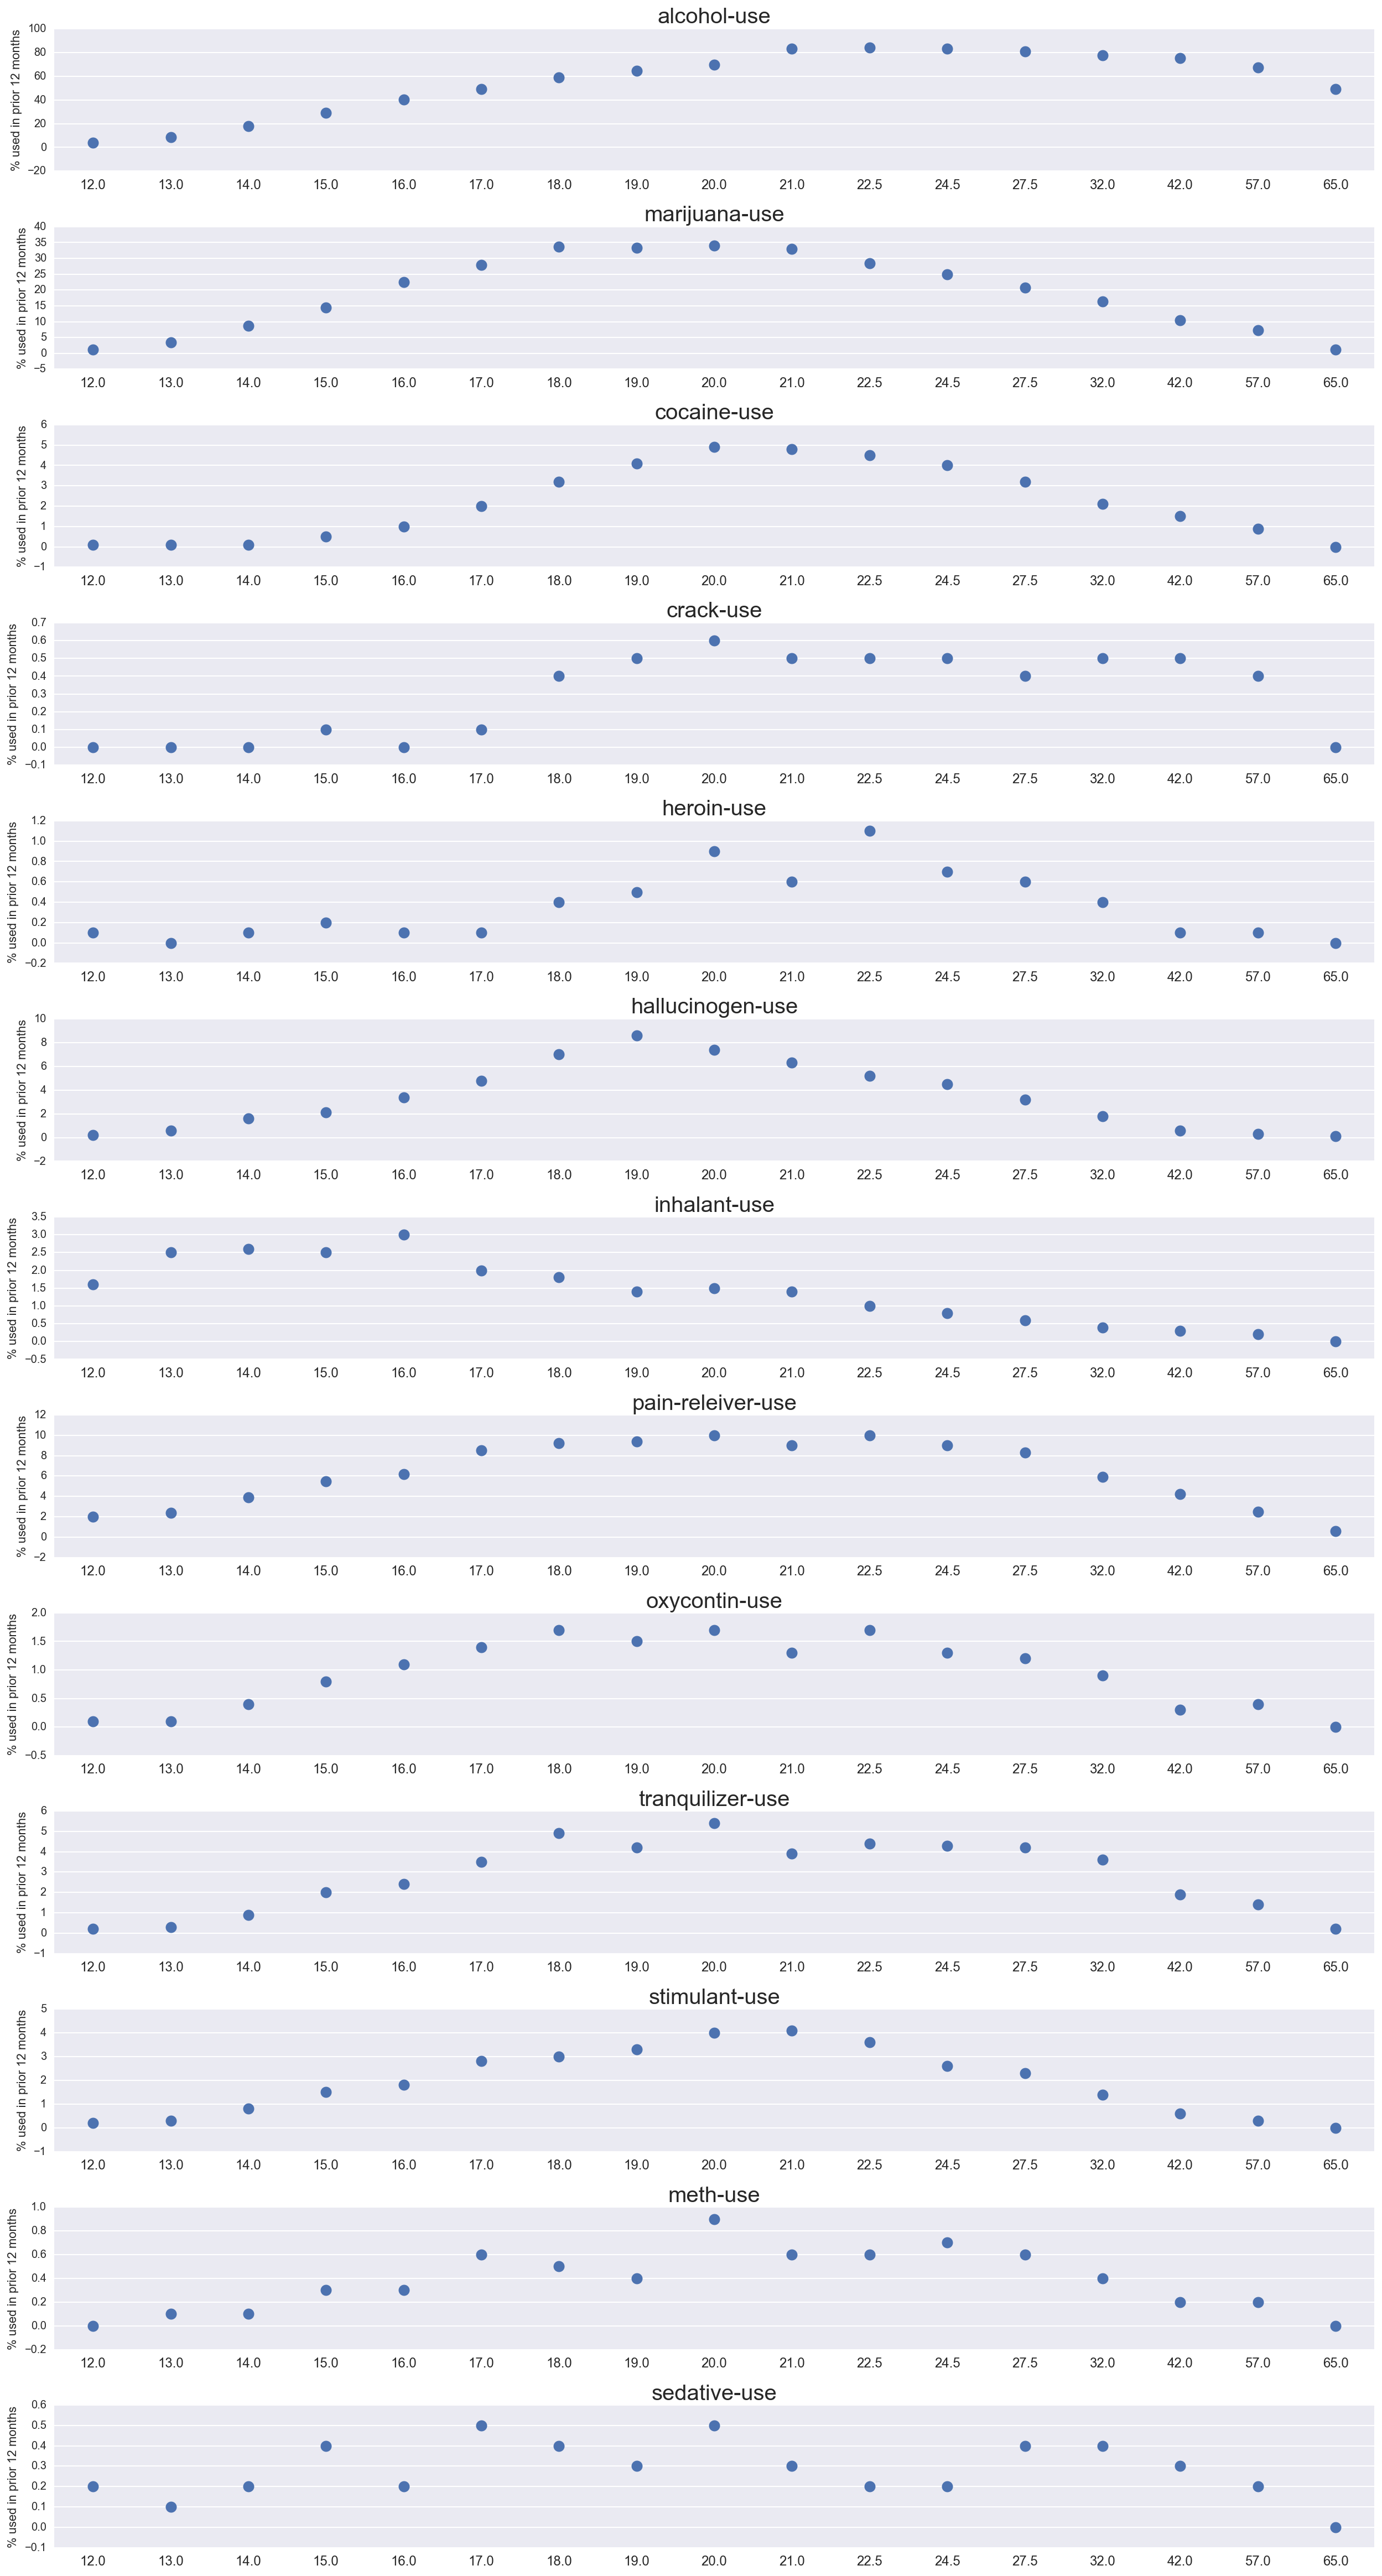

In [11]:
# Top section is loading dataframe and doing some cleaning (removing - values and making age a number so
# that we can grapth it. Main point of example is to highlight seaborn code below.)
drug_data_filepath = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/drug_use_by_age/drug-use-by-age.csv'
drug = pd.read_csv(drug_data_filepath)

use_cols = [c for c in drug.columns if c.endswith('use')]
freq_cols = [c for c in drug.columns if c.endswith('frequency')]
string_columns = [c for c in drug.columns if drug[c].dtype == np.object]


for sc in string_columns[1:]:
    drug.loc[:, sc] = drug[sc].map(lambda x: float(x) if x != '-' else np.nan)
    
drug[string_columns].dtypes
age_replace = {
    '12':12.,
    '13':13.,
    '14':14.,
    '15':15.,
    '16':16.,
    '17':17.,
    '18':18.,
    '19':19.,
    '20':20.,
    '21':21.,
    '22-23':22.5,
    '24-25':24.5,
    '26-29':27.5,
    '30-34':32.,
    '35-49':42.,
    '50-64':57.,
    '65+':65  
}

drug['age_num'] = drug.age.map(lambda x: age_replace[x])

##### This is the section to focus on for plotting! 

sns.set(style="darkgrid")

drug = drug.sort_values('age_num', ascending=True)

# Make the PairGrid
axarr = sns.PairGrid(drug, x_vars=['age'], 
                     y_vars=use_cols,
                     size=2.5, aspect=7.)


# Draw a dot plot using the stripplot function
axarr.map(sns.stripplot, size=10, orient="v", edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
axarr.set(ylabel="% used in prior 12 months", xlabel="")#ylim=(0.0, 100.),

# Use semantically meaningful titles for the columns
titles = use_cols

for ax, title in zip(axarr.axes.flat, titles):

    # Set a different title for each axes
    ax.set_title(title, fontsize=20)
    ax.set_xticklabels(drug.age_num.values, fontsize=12)
    for tk in ax.get_xticklabels():
        tk.set_visible(True)
    
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

#sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

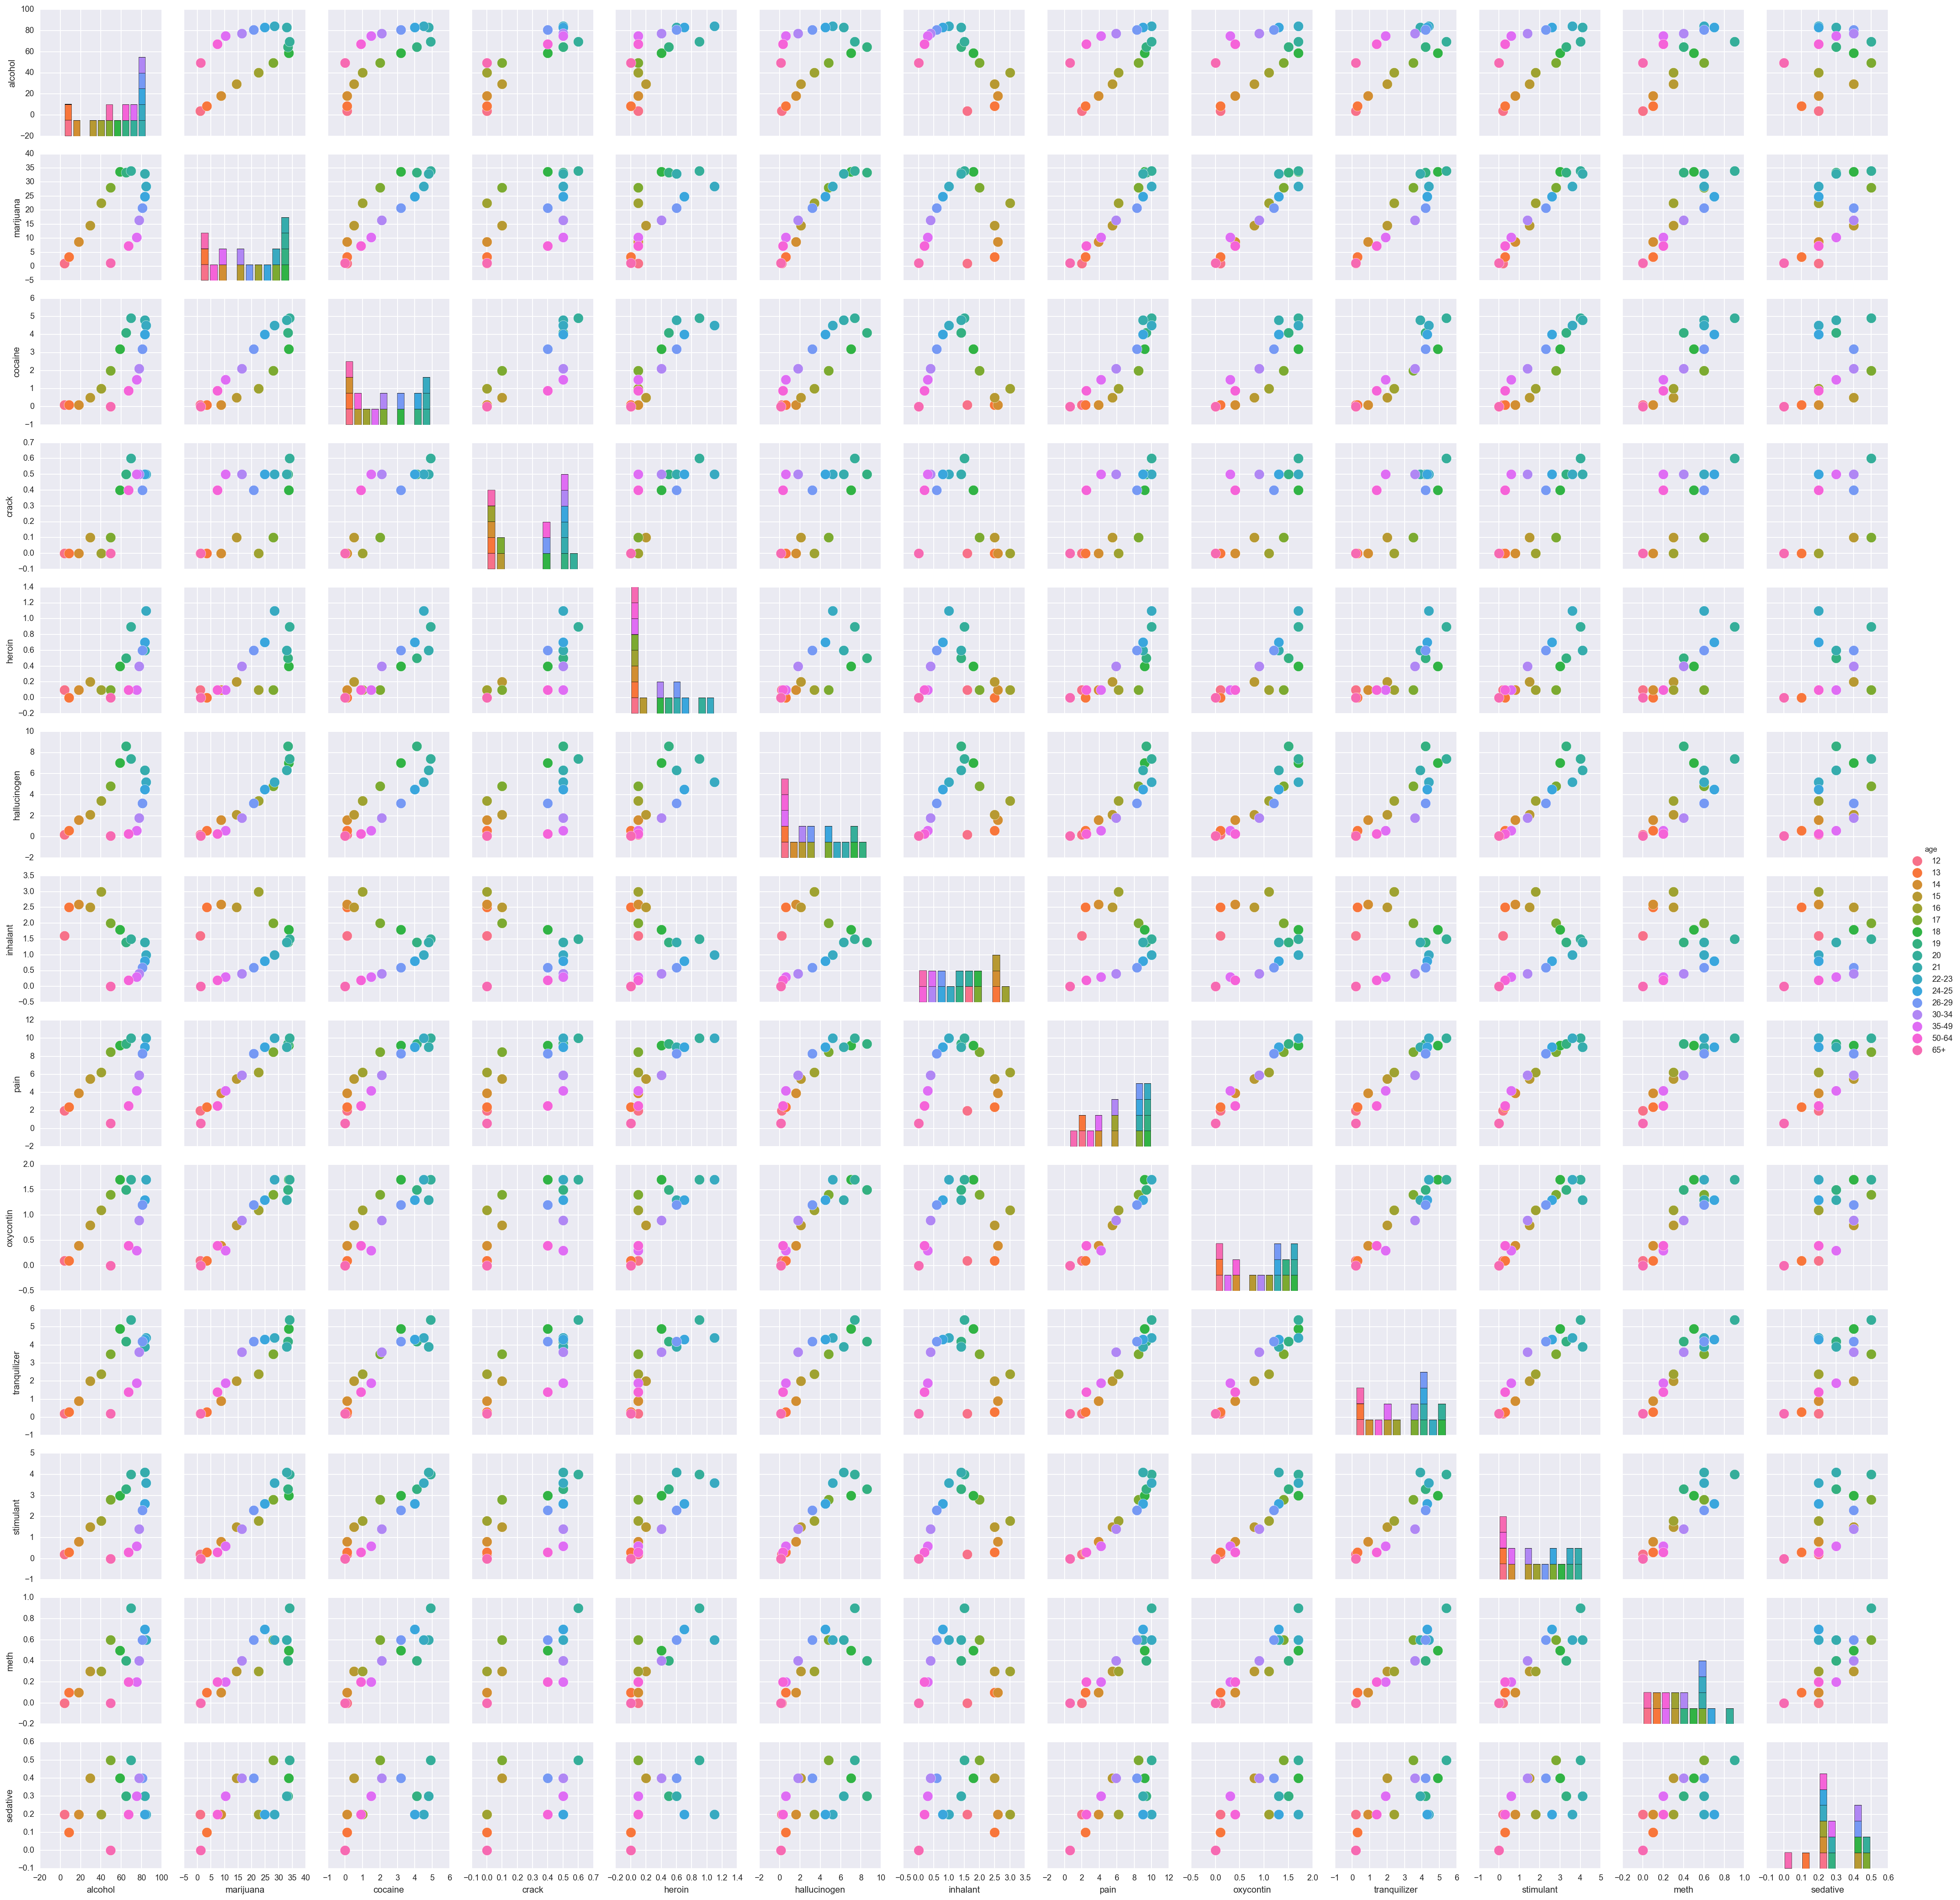

In [14]:
# Top section is loading dataframe and doing some cleaning (removing - values and making age a number so
# that we can grapth it. Main point of example is to highlight seaborn code below.)
drug_data_filepath = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/drug_use_by_age/drug-use-by-age.csv'
drug = pd.read_csv(drug_data_filepath)

use_cols = [c for c in drug.columns if c.endswith('use')]
freq_cols = [c for c in drug.columns if c.endswith('frequency')]
string_columns = [c for c in drug.columns if drug[c].dtype == np.object]


for sc in string_columns[1:]:
    drug.loc[:, sc] = drug[sc].map(lambda x: float(x) if x != '-' else np.nan)
    
drug[string_columns].dtypes
age_replace = {
    '12':12.,
    '13':13.,
    '14':14.,
    '15':15.,
    '16':16.,
    '17':17.,
    '18':18.,
    '19':19.,
    '20':20.,
    '21':21.,
    '22-23':22.5,
    '24-25':24.5,
    '26-29':27.5,
    '30-34':32.,
    '35-49':42.,
    '50-64':57.,
    '65+':65  
}

drug['age_num'] = drug.age.map(lambda x: age_replace[x])

drug_use = drug[['age_num','age']+use_cols]
drug_use.rename(columns={k:k.split('-')[0] for k in use_cols}, inplace=True)
drug_use.head()

# This is setting variables to use in pairplot to be all of the use columns by drug name. Hue gives us another 
#dimenion to the data by seperating out ages.
sns.pairplot(drug_use, hue='age', vars=[c.split('-')[0] for c in use_cols],
             kind='scatter', plot_kws={'s':150})

# Melt and pivot tables

Using a pivot table to summarize a data set

In [ ]:
titanic_file = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/titanic/titanic_clean.csv'
df = pd.read_csv(titanic_file)

titanic_pivot = pd.pivot_table(df, values = 'Fare', columns = ['Pclass','Survived'], aggfunc = [np.mean, np.std])
titanic_pivot.reset_index()

Using melt to covert a wide data frame to a long data frame

In [ ]:
titanic_file = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/titanic/titanic_clean.csv'
df = pd.read_csv(titanic_file)

pd.melt(df, id_vars = ['PassengerId'], value_vars=['Survived','PClass','Name','Sex','Age','Fare'], 
        value_name='Attribute Values', var_name = 'Attributes').reset_index(drop=True).head()

# Using Groupby

https://gist.github.com/bsweger/e5817488d161f37dcbd2

http://pandas.pydata.org/pandas-docs/stable/groupby.html
fast_food['psoda'] = fast_food.groupby('chain').transform(lambda x: x.fillna(x.mean()))

http://nbviewer.jupyter.org/urls/gist.githubusercontent.com/TomAugspurger/6e052140eaa5fdb6e8c0/raw/811585624e843f3f80b9b6fe89e18119d7d2d73c/dplyr_pandas.ipynb

http://pandas.pydata.org/pandas-docs/stable/cookbook.html

# Data Cleansing Tips and Tricks

### Checking data

Checking the number of null values per column

In [ ]:
drug_data_filepath = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/drug_use_by_age/drug-use-by-age.csv'
drug = pd.read_csv(drug_data_filepath)

print drug.shape
drug.isnull().sum()

Example of looping through object columns to identify the elements that can not be converted to float.

In [ ]:
drug_data_filepath = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/drug_use_by_age/drug-use-by-age.csv'
drug = pd.read_csv(drug_data_filepath)


def not_num_checker(x):
    try:
        x = float(x)
        return False
    except:
        return True

def find_invalid_items(data, column):
    print 'Column:', column
    print 'Invalid row items:'
    print [x for x in data[column].unique() if not_num_checker(x)]
    print '-------------------------------------------------\n'
    
string_columns = [c for c in drug.columns if drug[c].dtype == np.object]
print 'Object columns:', string_columns

for sc in string_columns:
    find_invalid_items(drug, sc)

### Updating Data Using Map

Updating column values using a dictionary

In [ ]:
drug_data_filepath = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/drug_use_by_age/drug-use-by-age.csv'
drug = pd.read_csv(drug_data_filepath)

age_replace = {
    '12':12.,
    '13':13.,
    '14':14.,
    '15':15.,
    '16':16.,
    '17':17.,
    '18':18.,
    '19':19.,
    '20':20.,
    '21':21.,
    '22-23':22.5,
    '24-25':24.5,
    '26-29':27.5,
    '30-34':32.,
    '35-49':42.,
    '50-64':57.,
    '65+':65  
}

drug['age_num'] = drug.age.map(lambda x: age_replace[x])
drug['age_num']

Example looping through columns and cleaning up bad values

In [ ]:
drug_data_filepath = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/drug_use_by_age/drug-use-by-age.csv'
drug = pd.read_csv(drug_data_filepath)

string_columns = [c for c in drug.columns if drug[c].dtype == np.object]

# all columns except age (skip the first)
for sc in string_columns[1:]:
    drug.loc[:, sc] = drug[sc].map(lambda x: float(x) if x != '-' else np.nan)
    
drug[string_columns].dtypes

### Using Loc To Add New Conditional Columns

In [18]:
drug_data_filepath = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/drug_use_by_age/drug-use-by-age.csv'
drug = pd.read_csv(drug_data_filepath)

#Creates new age column where we are replacing strings with floats to allow plotting
age_replace = {
    '12':12.,
    '13':13.,
    '14':14.,
    '15':15.,
    '16':16.,
    '17':17.,
    '18':18.,
    '19':19.,
    '20':20.,
    '21':21.,
    '22-23':22.5,
    '24-25':24.5,
    '26-29':27.5,
    '30-34':32.,
    '35-49':42.,
    '50-64':57.,
    '65+':65  
}

drug['age_num'] = drug.age.map(lambda x: age_replace[x])

#Uses melt to convert to long data structure
drug_type = pd.melt(drug, id_vars=['age','age_num','n'])

#Uses map and labmda function to add new column stripping out -use from alcohol-use as adds to new column
drug_type['drug'] = drug_type.variable.map(lambda x: x.split('-')[0])
drug_type['use_freq'] = drug_type.variable.map(lambda x: x.split('-')[1])
drug_type.head()

#Add Drug Type Column
drug_type.loc[drug_type.drug.isin(['alcohol','heroin','pain','inhalant',
                                   'oxycontin','tranquilizer','sedative']), 'drug_type'] = 'sedative'
drug_type.loc[drug_type.drug.isin(['cocaine','crack','stimulant','meth']), 'drug_type'] = 'stimulant'
drug_type.loc[drug_type.drug.isin(['hallucinogen','marijuana']), 'drug_type'] = 'hallucinogen'

#Add Legal Column
drug_type.loc[drug_type.drug.isin(['alcohol','pain','inhalant','oxycontin','sedative','tranquilizer',
                                   'stimulant']), 
              'legality'] = 'legal'
drug_type.loc[drug_type.drug.isin(['heroin','cocaine','crack','meth','hallucinogen','marijuana']),
              'legality'] = 'illegal'

drug_type.head()

,age,age_num,n,variable,value,drug,use_freq,drug_type,legality
0,12,12.0,2798,alcohol-use,3.9,alcohol,use,sedative,legal
1,13,13.0,2757,alcohol-use,8.5,alcohol,use,sedative,legal
2,14,14.0,2792,alcohol-use,18.1,alcohol,use,sedative,legal
3,15,15.0,2956,alcohol-use,29.2,alcohol,use,sedative,legal
4,16,16.0,3058,alcohol-use,40.1,alcohol,use,sedative,legal


# Initial Data Review

Check data types of columns as well as shape and null count. Always want to start here.

In [6]:
drug_data_filepath = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/drug_use_by_age/drug-use-by-age.csv'
drug = pd.read_csv(drug_data_filepath)

drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

High level description of data including count, mean, and std along with range and quartiles.

In [5]:
drug_data_filepath = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/drug_use_by_age/drug-use-by-age.csv'
drug = pd.read_csv(drug_data_filepath)

drug.describe().T

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.0,2798.0,3058.0,7391.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1
hallucinogen-use,17.0,3.394118,2.792506,0.1,0.6,3.2,5.2,8.6
hallucinogen-frequency,17.0,8.411765,15.000245,2.0,3.0,3.0,4.0,52.0


In [3]:
dic = {'A':1,'B':2}
print dic['A']

1
